<a href="https://colab.research.google.com/github/S-loaiza-UAO/Machine-learning-UAO/blob/main/Taller_metodo_ensamble%26arbol_decisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller de Modelado de Aprendizaje Automático con Árboles de Decisión y Métodos de Ensamble

**Objetivo General:**

Aplicar y comparar algoritmos de aprendizaje automático supervisado, con énfasis en los árboles de decisión y métodos de ensamble, para la clasificación de datos de diagnóstico de cáncer de mama de Wisconsin. Se deberán entrenar, validar y analizar modelos, y reflexionar sobre las ventajas de las técnicas utilizadas.

**Dataset:**

Diagnóstico de cáncer de mama de Wisconsin, disponible en UCI Machine Learning Repository.


**Objetivos específicos:**

*   Preprocesamiento de Datos
*   Entrenamiento de Modelos: Se deberan implementar tres modelos de clasificación como árbol de decisión y un método de ensamble.
*   Evaluación de Modelos: Utilizando la matriz de confusión, reportes de clasificación y análisis de la Curva ROC.
*   Métricas de Rendimiento.
*   Reflexión sobre las ventajas de los árboles de decisión y los métodos de ensamble en contextos de aprendizaje supervisado.

# Librerías

In [172]:
# Importación de librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from matplotlib.patheffects import withStroke
from scipy import stats
import numpy as np
import itertools
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, precision_score, recall_score

# Etapa 1: Descripción y análisis del Data Set

In [143]:
# Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ["ID", "Diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness", "mean_compactness", "mean_concavity", "mean_concave_points", "mean_symmetry", "mean_fractal_dimension", "se_radius", "se_texture", "se_perimeter", "se_area", "se_smoothness", "se_compactness", "se_concavity", "se_concave_points", "se_symmetry", "se_fractal_dimension", "worst_radius", "worst_texture", "worst_perimeter", "worst_area", "worst_smoothness", "worst_compactness", "worst_concavity", "worst_concave_points", "worst_symmetry", "worst_fractal_dimension"]
df = pd.read_csv(url, names=names)
df.head()


,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
print("Cantidad de registros:", df.shape[0])
print("Cantidad de atributos:", df.shape[1])

Cantidad de registros: 569
Cantidad de atributos: 32


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   mean_radius              569 non-null    float64
 3   mean_texture             569 non-null    float64
 4   mean_perimeter           569 non-null    float64
 5   mean_area                569 non-null    float64
 6   mean_smoothness          569 non-null    float64
 7   mean_compactness         569 non-null    float64
 8   mean_concavity           569 non-null    float64
 9   mean_concave_points      569 non-null    float64
 10  mean_symmetry            569 non-null    float64
 11  mean_fractal_dimension   569 non-null    float64
 12  se_radius                569 non-null    float64
 13  se_texture               569 non-null    float64
 14  se_perimeter             5

Caracteristicas de los tipos de datos obtenidos del DataSet y observacion de que los datos estan completos, no hay valores nulos o faltantes.


In [146]:
df.columns

Index(['ID', 'Diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
       'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
       'se_fractal_dimension', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [147]:
df.isnull().sum()

ID                         0
Diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
se_radius                  0
se_texture                 0
se_perimeter               0
se_area                    0
se_smoothness              0
se_compactness             0
se_concavity               0
se_concave_points          0
se_symmetry                0
se_fractal_dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

Se evidencian que los datos registrados estan completos dentro del DataSet.

In [148]:
df.describe()

,ID,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Realizaremos un análisis de los datos categóricos de la variable "Diagnosis" para evidenciar posibles desbalances del DataSet

In [149]:
variable_categorica= df.select_dtypes(include=['object']).columns[0:]
print(variable_categorica)

Index(['Diagnosis'], dtype='object')


In [150]:
for variable in variable_categorica[:1]:
    # Histograma
    countplot_fig = px.histogram(df, x=df[variable].value_counts().index, y=df[variable].value_counts().values,title=f'Conteo datos {variable}')
    countplot_fig.update_traces(texttemplate='%{y}', textposition='outside')
    countplot_fig.update_xaxes(categoryorder='total ascending')
    # Gráfico de torta
    counts = df[variable].value_counts()
    labels = counts.index
    pie_chart_fig = px.pie(names=labels, values=counts, title=f'Gráfico de Torta para {variable}',
                        labels={'names': '', 'values': ''},
                        hole=0.3)

    # Mostrar leyenda al pie chart usando las etiquetas del índice
    pie_chart_fig.update_traces(textinfo='percent+label', pull=[0.05]*len(labels))

    # Guardar y mostrar la figura

    countplot_fig.write_html(f"{variable}_countplot.html")
    pie_chart_fig.write_html(f"{variable}_pie_chart.html")
    countplot_fig.show()
    pie_chart_fig.show()

Se evidencia que existe un desbalance en los datos, cabe resaltar que esta variable sería la variable objetivo de este DataSet.

Para las variables numéricas realizaremos un análisis mediante los metodos de correlación, que son herramientas estadísticas que miden la relación entre dos variables. La elección del método adecuado depende de las características de las variables y del tipo de relación que se desea analizar.

1. Correlación de Pearson:

Mide la relación lineal entre dos variables cuantitativas.
Su valor varía entre -1 y 1:
-1: correlación negativa perfecta.
0: no hay correlación.
1: correlación positiva perfecta.
Es sensible a valores atípicos (outliers) que pueden distorsionar el resultado.
Se utiliza para predecir una variable a partir de la otra.
2. Correlación de Spearman:

Mide la relación monotónica (creciente o decreciente) entre dos variables cualitativas (ordinales) o cuantitativas.
Su valor varía entre -1 y 1, similar a la correlación de Pearson.
Es menos sensible a valores atípicos que la correlación de Pearson.
Se utiliza para comparar dos conjuntos de datos ordenados.
3. Correlación de Kendall:

Mide la concordancia entre dos variables cualitativas (ordinales) o cuantitativas.
Su valor varía entre -1 y 1, similar a la correlación de Pearson y Spearman.
Es menos sensible a valores atípicos que la correlación de Pearson.
Se utiliza para medir la asociación entre dos variables sin importar la forma de la relación.

In [151]:
variables_numericas= df.select_dtypes(include=['number']).columns
print(variables_numericas)

Index(['ID', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
       'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
       'se_fractal_dimension', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')


In [152]:
def stars(p):
    """
    Returns a string of asterisks (*) based on the significance level (alpha value) of a statistical test.

    Args:
        p (float): the p-value of the statistical test

    Returns:
        A string of asterisks indicating the significance level, as follows:
        - five asterisks (*****): alpha value is 0.0001 or 0.01% with 99.99% confidence
        - four asterisks (****): alpha value is 0.001 or 0.1% with 99.9% confidence
        - three asterisks (***): alpha value is 0.01 or 1% with 99% confidence
        - two asterisks (**): alpha value is 0.05 or 5% with 95% confidence
        - one asterisk (*): alpha value is 0.1 or 10% with 90% confidence
        - empty string (''): alpha value is greater than or equal to 0.1
    """
    if p < 0.0001:
        return '*****'
    elif p < 0.001:
        return '****'
    elif p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

In [153]:
def plot_correlations(dataframe, corr_methods):
    for method in corr_methods:
        stroke = withStroke(linewidth=2, foreground='black')
        corr_matrix = dataframe.corr(method=method)
        pval_matrix = dataframe.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

        # Create a mask to show only the lower triangle of the matrix
        mask = np.triu(np.ones_like(corr_matrix))
        mask2 = np.tril(np.ones_like(corr_matrix))
        stars_corr = pval_matrix * mask2 + mask
        pval_stars = stars_corr.applymap(stars)
        color_palette = sns.color_palette("Blues")
        with sns.axes_style("whitegrid"):
            f, ax = plt.subplots(figsize=(12, 10))
            ax = sns.heatmap(corr_matrix.round(4),
                            mask=mask,
                            vmax=1,
                            center=0,
                            vmin=-1,
                            square=True,
                            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True),
                            linewidths=.5,
                            annot=True,
                            annot_kws={"size": 12},
                            fmt='.1f')
            ax.set_title(f'{method.capitalize()} Correlations Matrix', fontsize=20)
            plt.xticks(fontsize=9)
            plt.yticks(fontsize=9)

            for i, j in itertools.product(range(corr_matrix.shape[0]), range(corr_matrix.shape[0])):
                ax.text(j + 0.5, i + 0.8, pval_stars.iloc[i, j], ha='center', va='center', color='white', fontsize=5,path_effects=[stroke])

            plt.savefig((f'correlation_vi_{method.capitalize()}_triangular_stage.png'), dpi=300, bbox_inches='tight')
            plt.show()

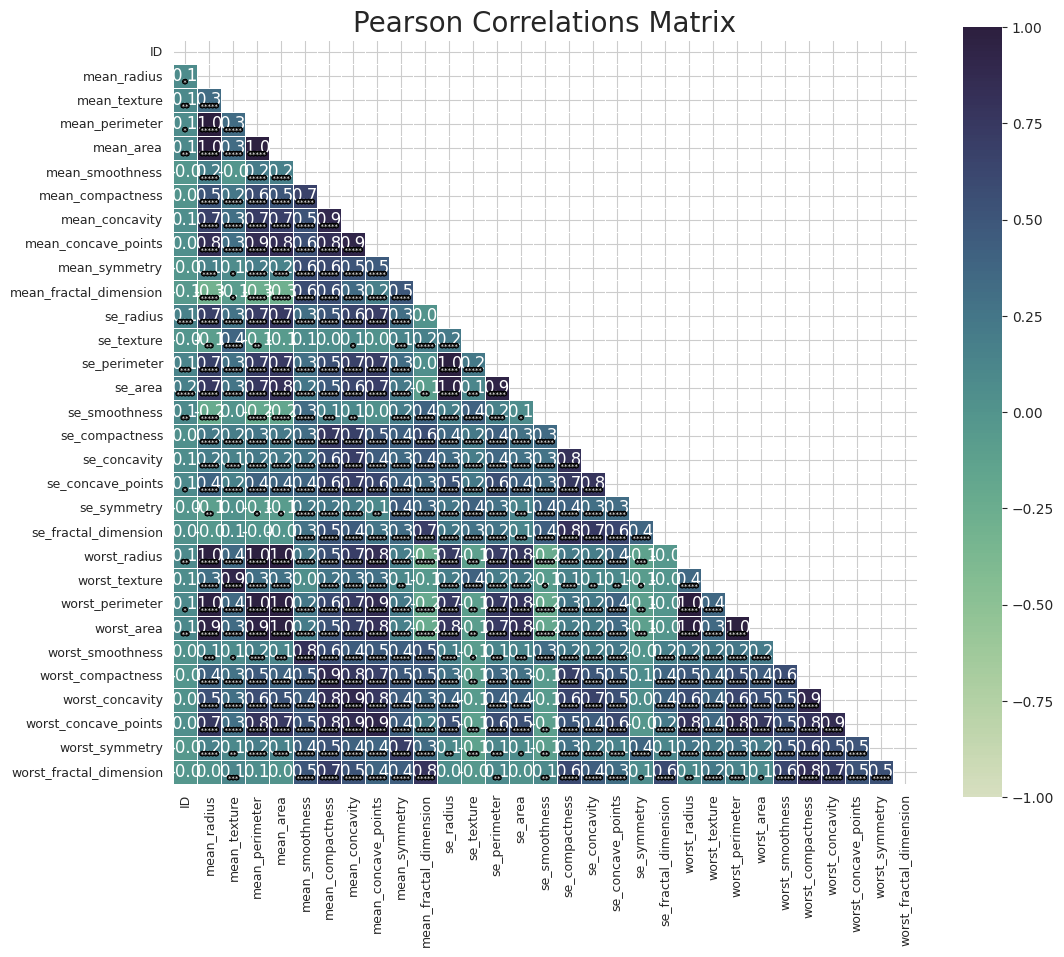

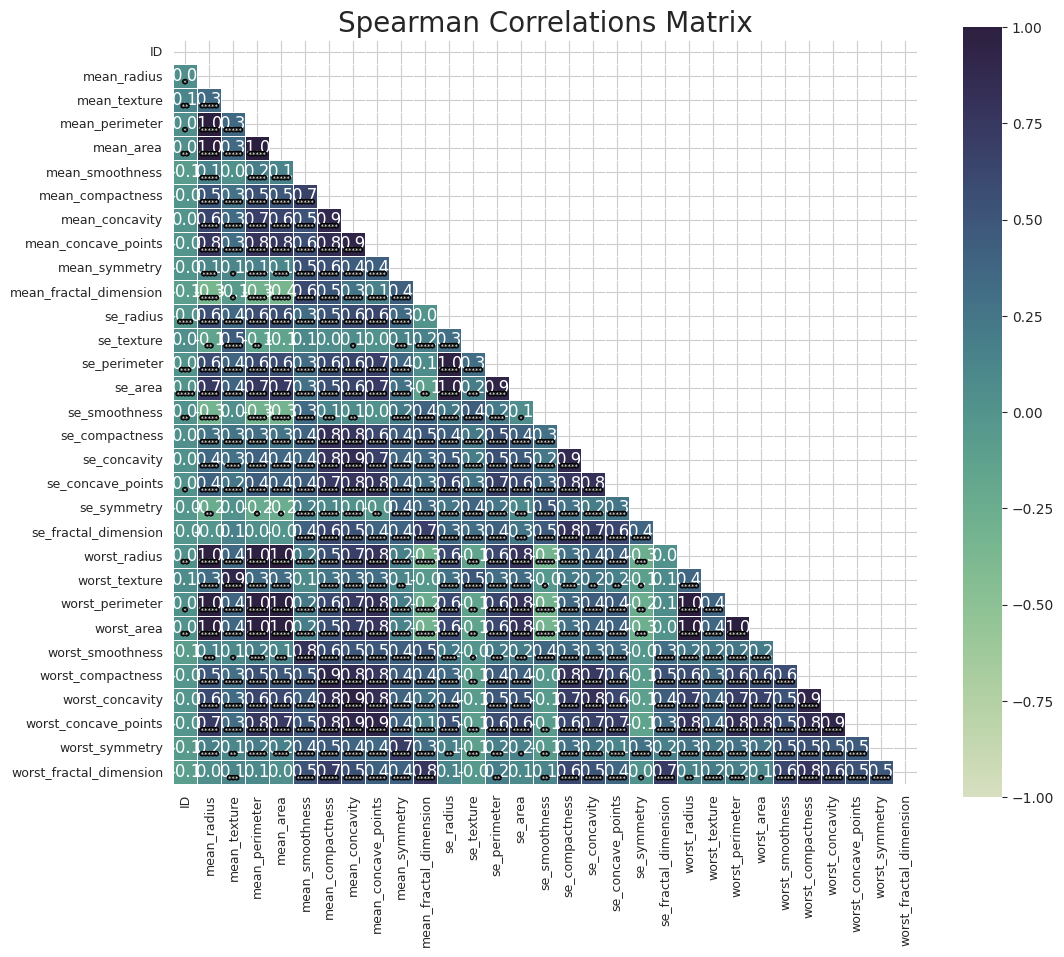

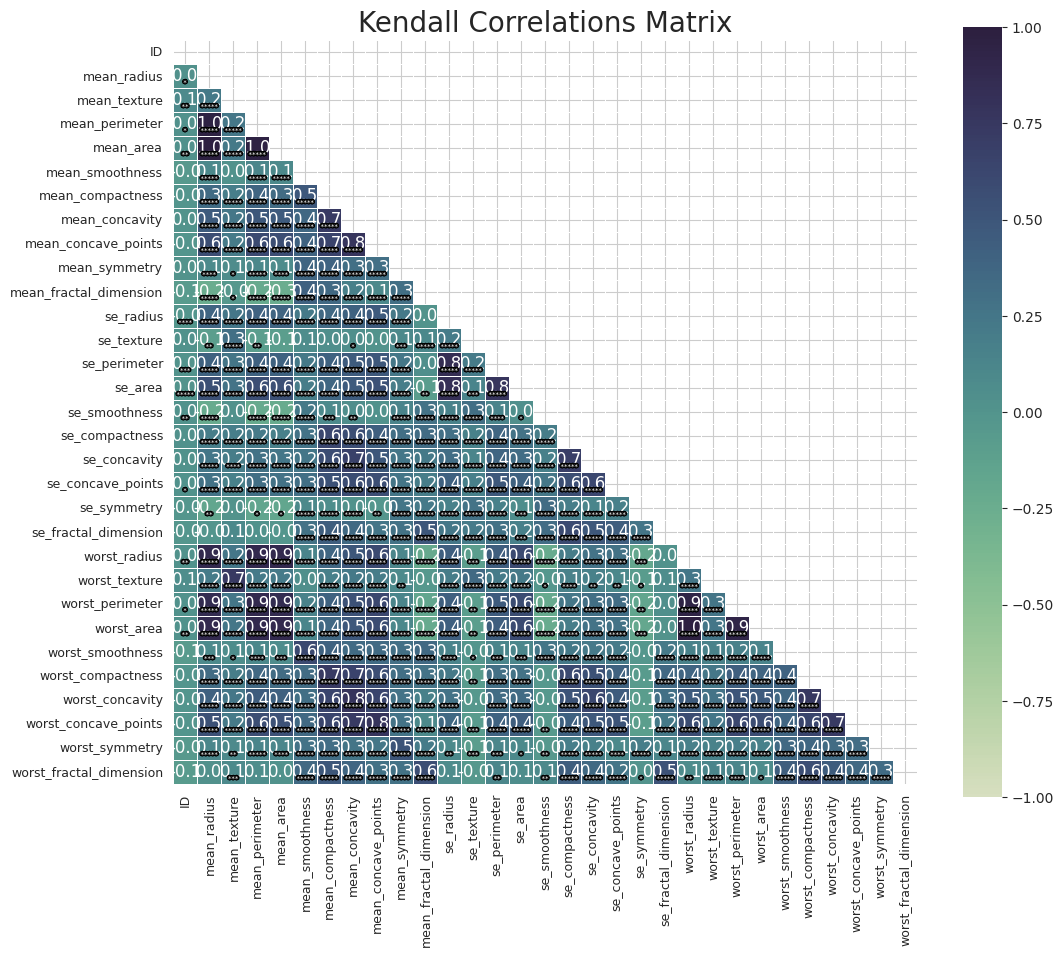

In [154]:
correlation_methods = ['pearson','spearman','kendall']
plot_correlations(df[variables_numericas],correlation_methods)

Despues de analizar las correlaciones ejecutadas, se podrian inferir algunas de las siguientes hipotesis:

Pearson
1.   La Variable ID claramente no presenta ningun tipo de relación con la
informacion, al momento de entrenar los modelos conviene descartarla.
2.   Las variable Area, radio y perimetro en los atributos "mean", "se" y "worst" presentan una correlacion positiva perfecta al estar intrinsecamente relacionadas en terminos geométricos.





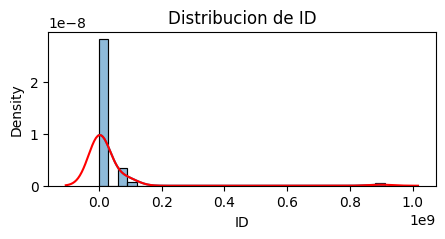

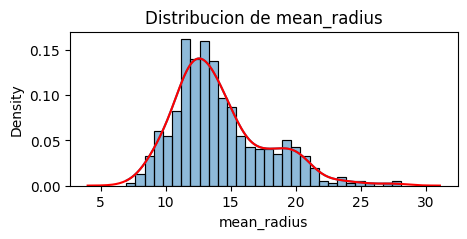

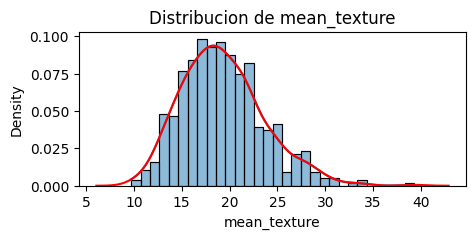

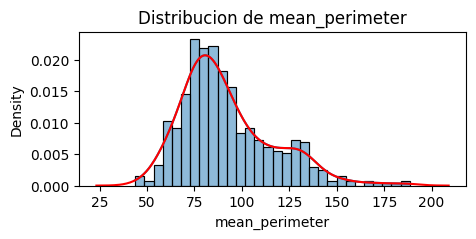

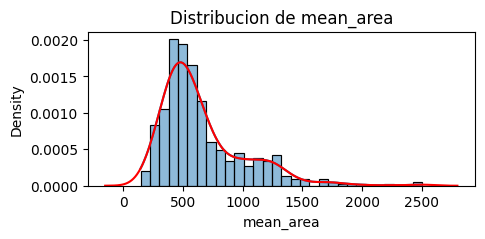

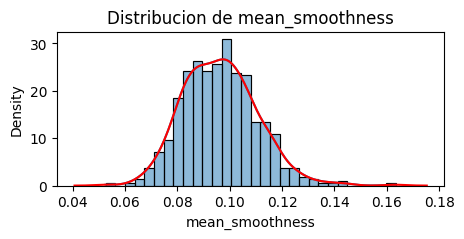

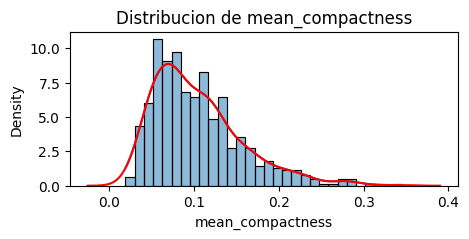

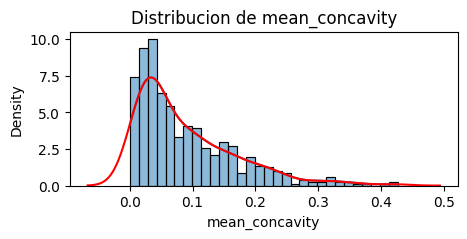

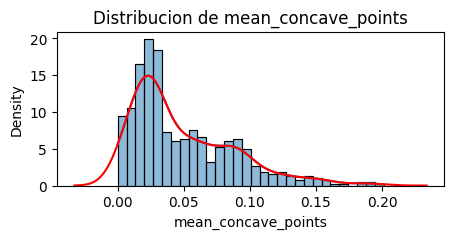

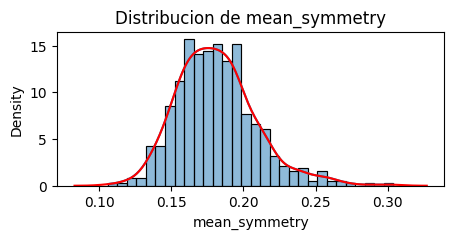

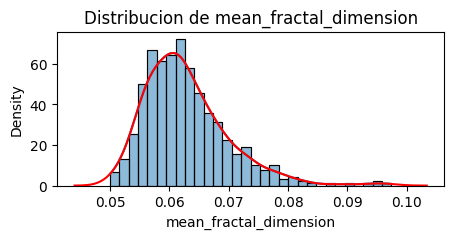

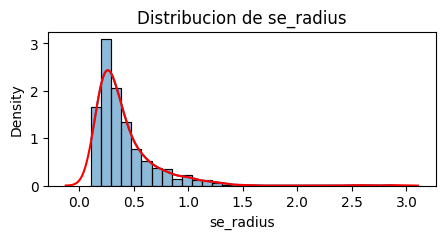

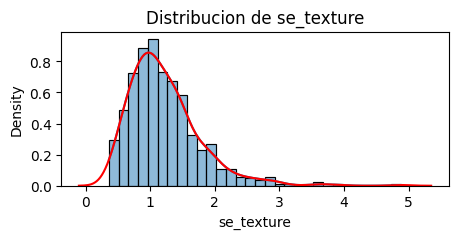

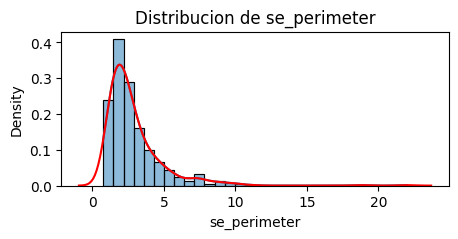

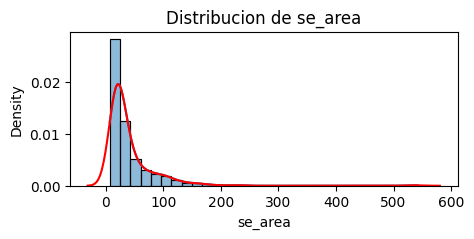

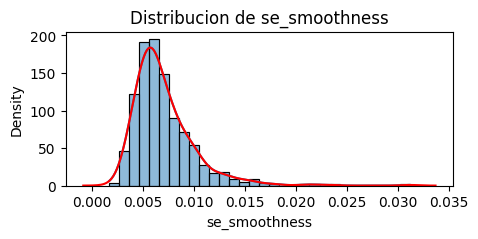

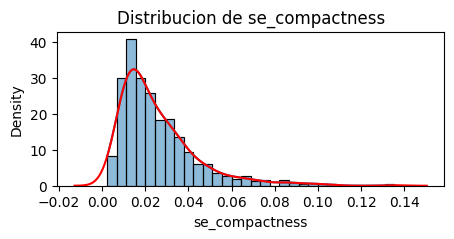

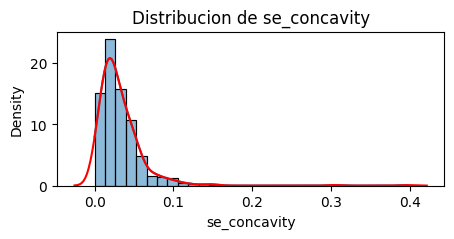

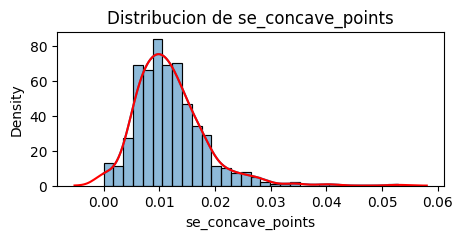

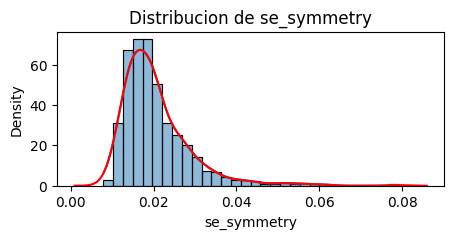

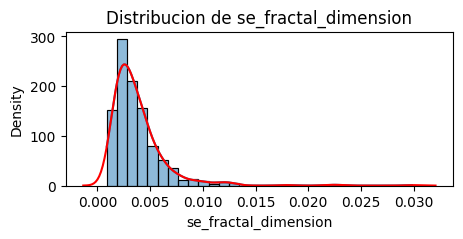

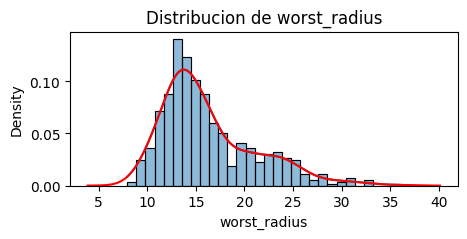

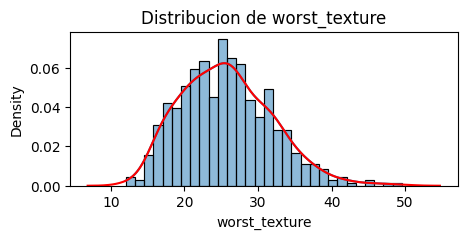

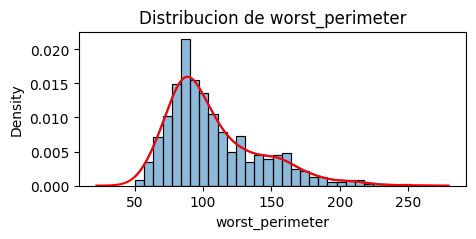

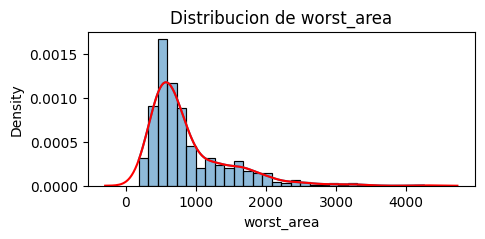

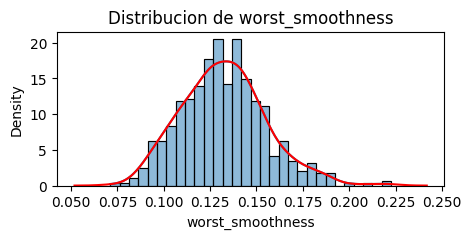

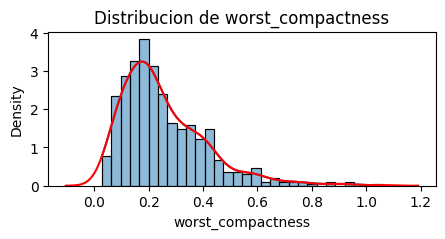

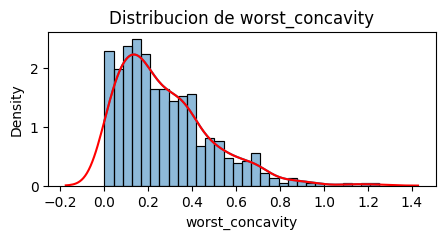

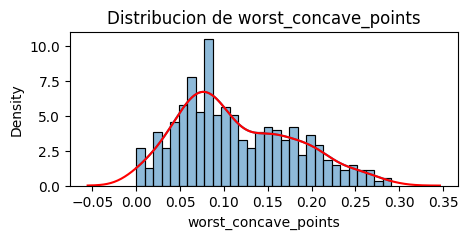

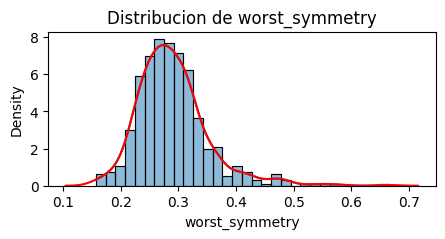

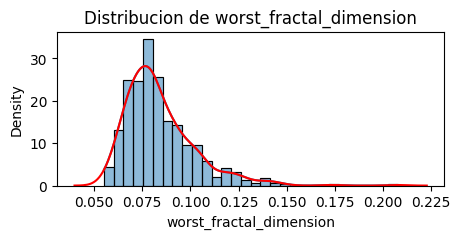

In [155]:
for col in variables_numericas:
    plt.figure(figsize=(5, 2))
    plt.title(f'Distribucion de {col}')
    sns.histplot(df[col], bins=30, kde=True, stat='density')
    sns.kdeplot(df[col], color='red')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.savefig(f'density_{col}_plot.png')
    plt.show()

Realizando un analisis de las variables con el objetivo podemos analizar lo siguiente
Analisis Bi-Variado

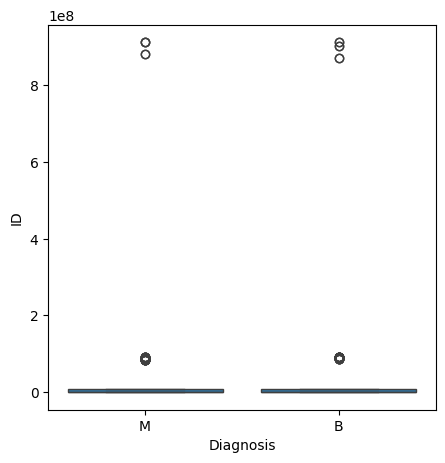

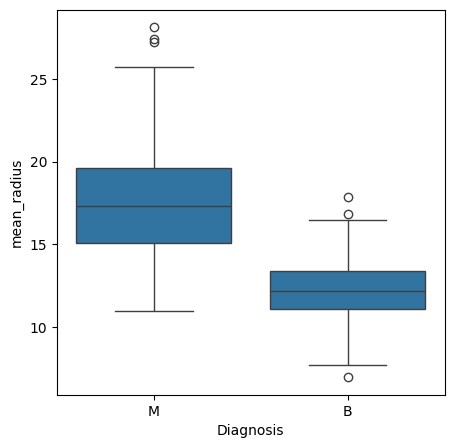

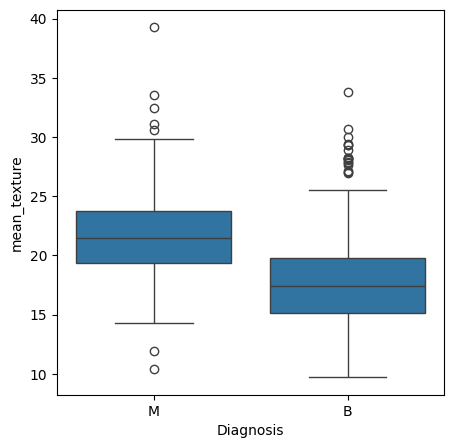

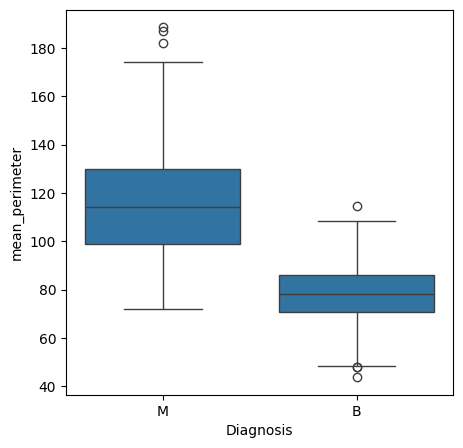

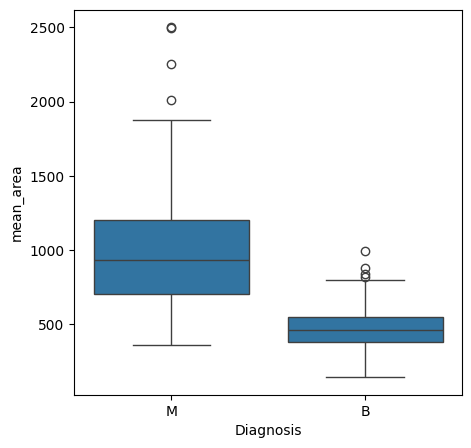

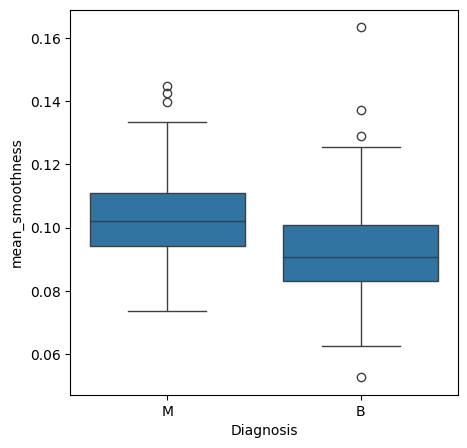

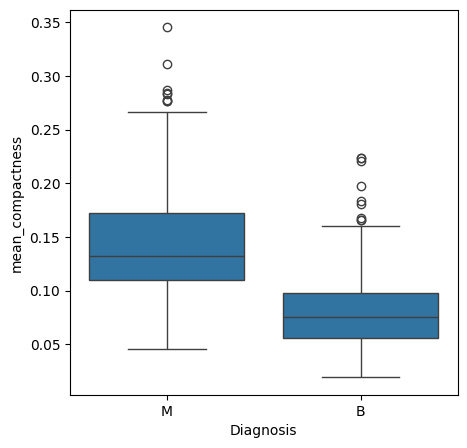

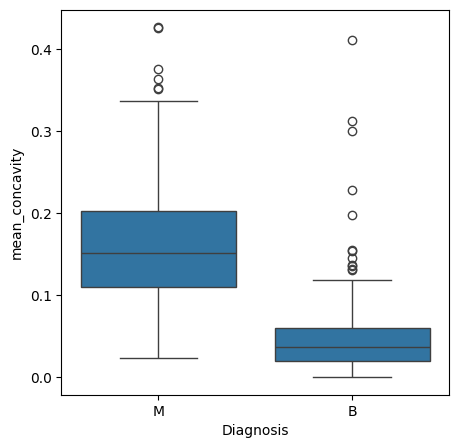

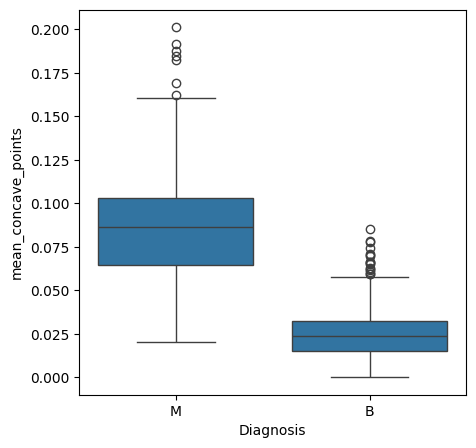

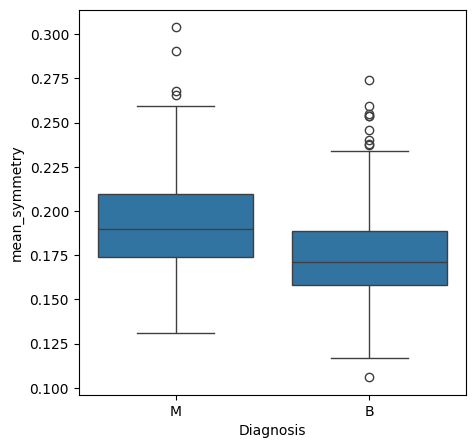

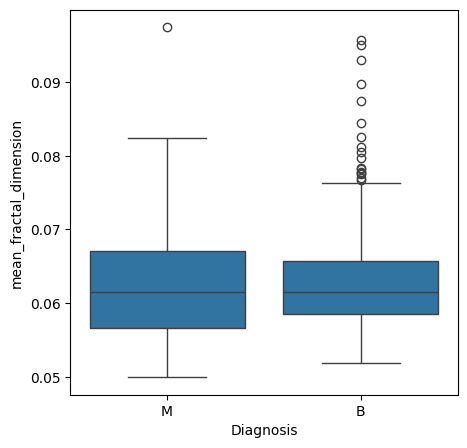

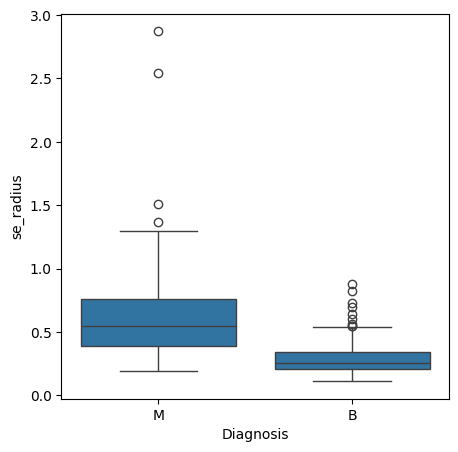

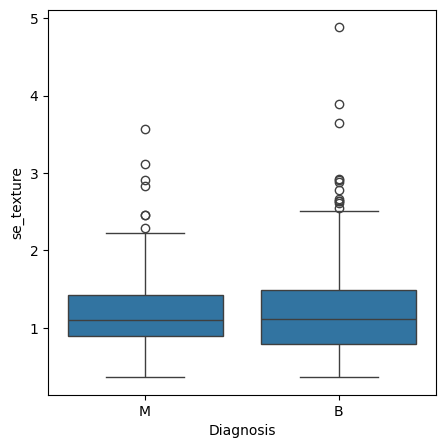

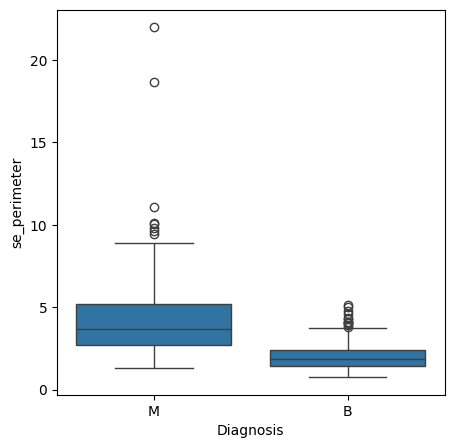

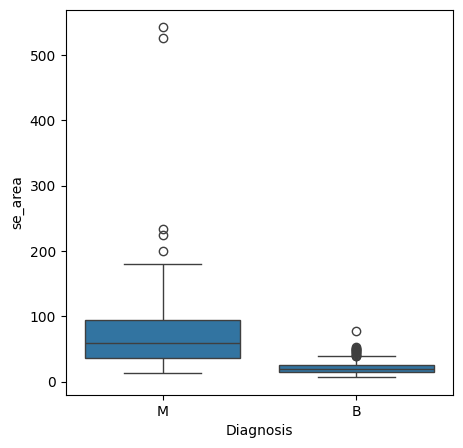

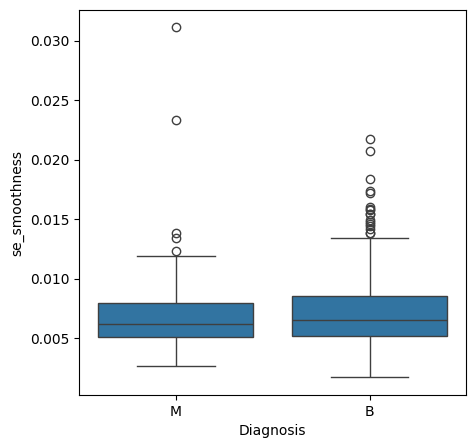

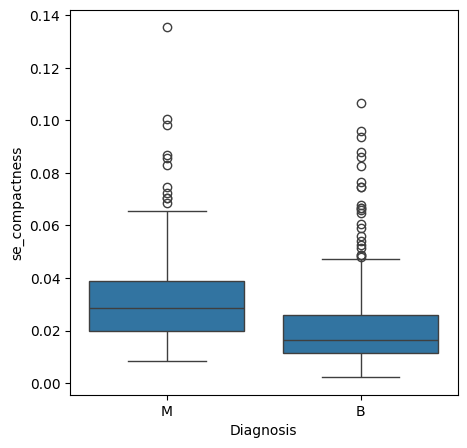

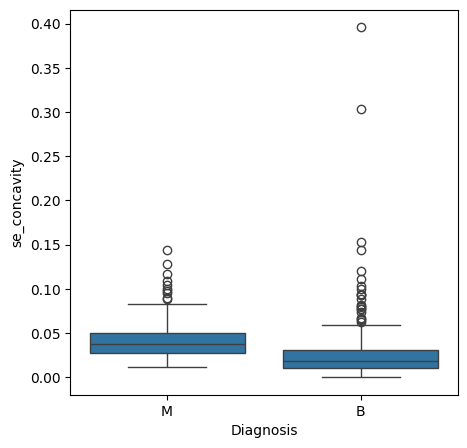

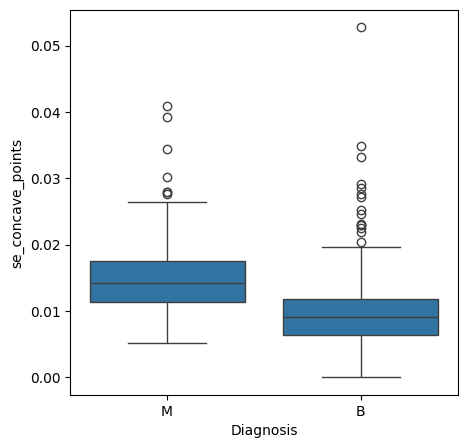

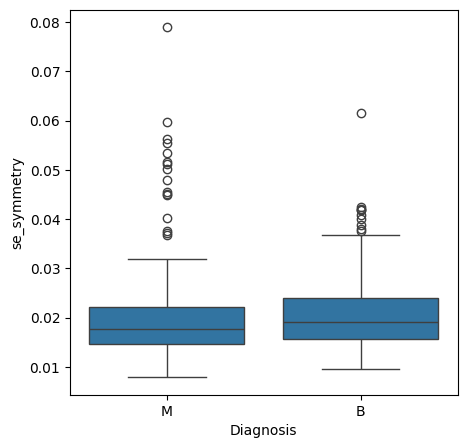

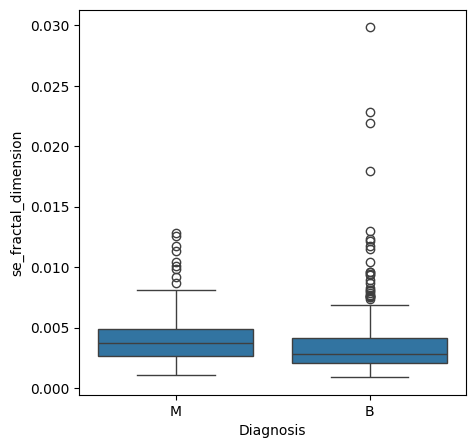

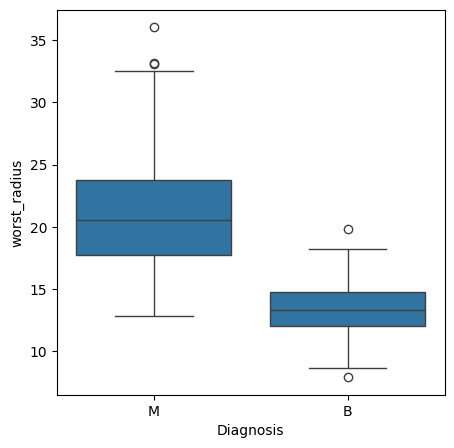

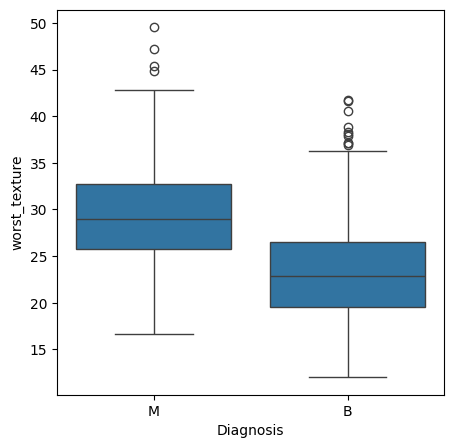

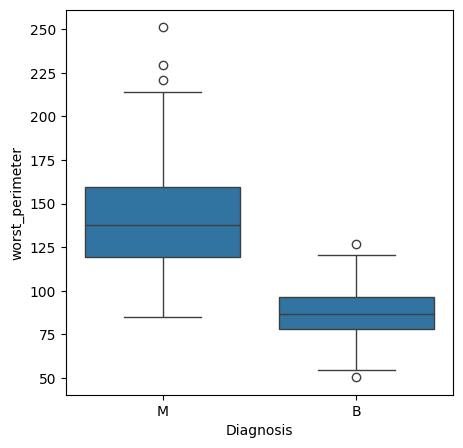

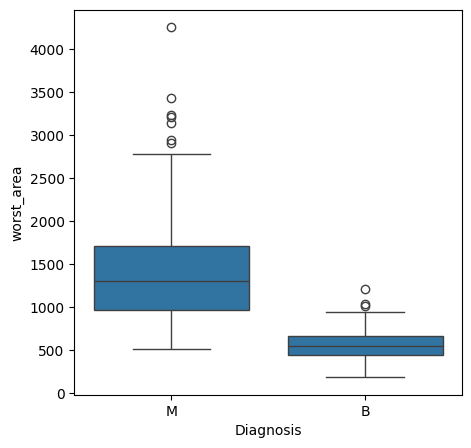

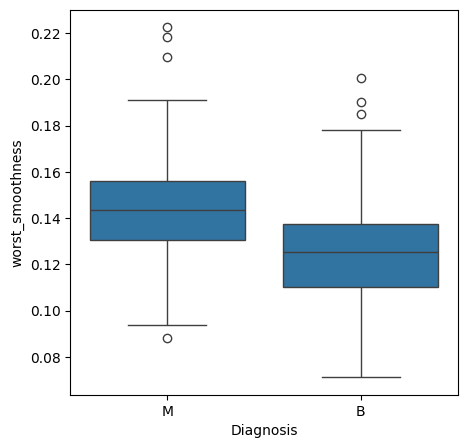

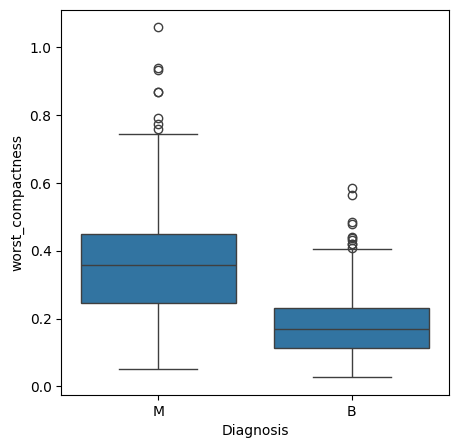

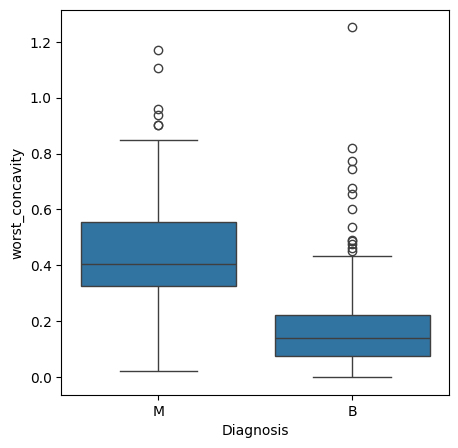

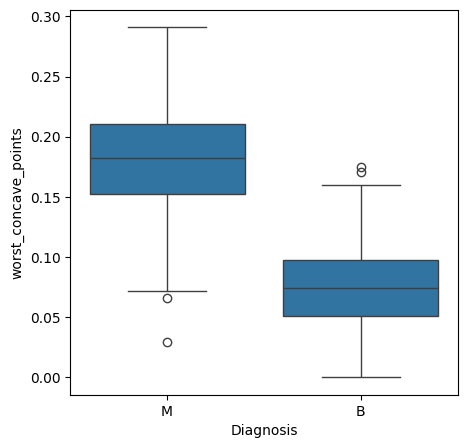

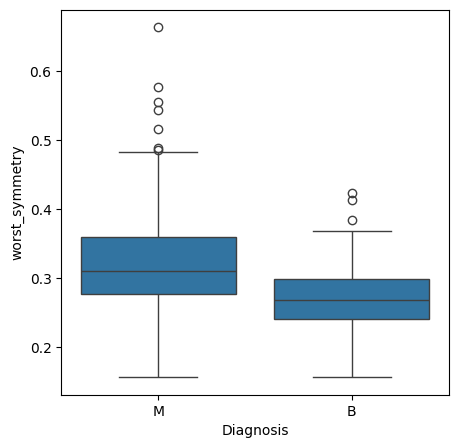

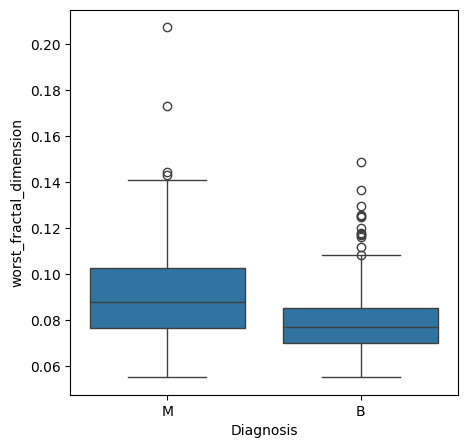

In [156]:
def bivariate_analysis_numerical(df, var_target, var_numerical):
    for col in var_numerical:
        plt.figure(figsize=(5, 5))
        sns.boxplot(x=var_target,y=col,data=df)
        plt.show()

bivariate_analysis_numerical(df,'Diagnosis',variables_numericas)

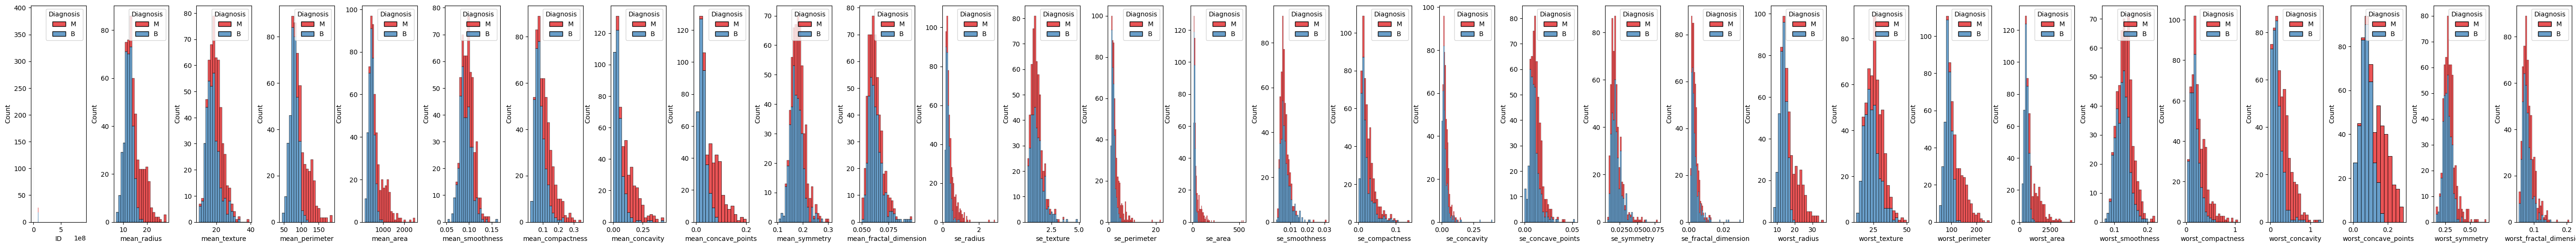

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=31, figsize=(70, 6), squeeze=False, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

for i, feature in enumerate(variables_numericas):
    row = i // 31  # Calcular el índice de la fila
    col = i % 31   # Calcular el índice de la columna
    sns.histplot(x=df[feature], hue=df['Diagnosis'], multiple="stack", palette="Set1", ax=axes[row, col])
    #axes[row, col].set_title(feature)  # Añadir títulos a las subtramas
    plt.savefig("complete_histogram.png")

plt.show()

#   Etapa 2: Conclusiones del análisis de la información

De acuerdo al analisis de los datos:

1.   las variables "WORST" que se refiere al valor máximo entre todas las mediciones realizadas se observan mayormente distribuidos en los histogramas, notandose un mayor diferenciacion para "M" y "B", con esto podriamos concluir que las observaciones medicas que presentan mayores cambios en su composicion geometrica tienen mayor probabilidad de ser "M".
2.   Las observaciones con areas mas grandes de igual manera tienen mayor probabilidad de ser "M".


#Etapa 3: Balanceo de Datos con implementacion de RANDOM OVER SAMPLING
Teniendo en cuenta que la variable objetivo presenta un desbalance en los registros, se propone un df1 con 145 datos adicionales para la categoria "M"

In [157]:
df1=df.copy()

In [158]:
df1.head()

,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [159]:
df1_majority = df1[df.Diagnosis == "B"]
df1_minority = df1[df.Diagnosis == "M"]

Diagnosis_distribution = df['Diagnosis'].value_counts()

df1_minority_upsampled = resample(df1_minority,
                                 replace=True,                              # sample with replacement
                                 n_samples=Diagnosis_distribution["B"],     # to match majority class
                                 random_state=1000)                          # reproducible results

# Combine majority class with upsampled minority class
df1_upsampled = pd.concat([df1_majority, df1_minority_upsampled])

# Display new class counts
upsampled_Diagnosis_distribution = df1_upsampled['Diagnosis'].value_counts()

Validamos que el df1 haya quedado balanceado para la variable objetivo.

In [160]:
df1_upsampled['Diagnosis'].value_counts()

B    357
M    357
Name: Diagnosis, dtype: int64

# Etapa 4: Preparación de los datos:
tras asegurar que el df1 esta balanceado para evitar sesgo en la predicción, se propone un df2 para categorizar la variable "Diagnosis" como categorica ordinal.

In [161]:
df2=df1_upsampled.copy()

In [162]:
variable_categorica_df2= df2.select_dtypes(include=['object']).columns[0:]
print(variable_categorica_df2)

Index(['Diagnosis'], dtype='object')


In [163]:
# codificación de variables categóricas
label_encoders = {}

for cate in variable_categorica_df2[:1]:
    le = LE()
    df2[cate] = le.fit_transform(df2[cate])
    label_encoders[cate] = dict(zip(le.classes_, le.transform(le.classes_)))

for var in variable_categorica_df2[:1]:
    print('---------------------------------------------------')
    print(f'La Variable: {var} tiene este diccionario de codificación:\n')
    print(label_encoders[var])

---------------------------------------------------
La Variable: Diagnosis tiene este diccionario de codificación:

{'B': 0, 'M': 1}


Verificamos la codificación para la variable "Diagnosis" en df2

In [164]:
df2.head()

,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


Verificamos el tamaño final del df2 que finalmente deberia de quedar con 714 registros.

In [166]:
print("Cantidad de registros en df2:", df2.shape[0])
print("Cantidad de atributos en df2:", df2.shape[1])

Cantidad de registros en df2: 714
Cantidad de atributos en df2: 32


# Etapa 5: Normalización de los datos con método StandarScaler

In [170]:
scaler = StandardScaler()
df2[variables_numericas] = scaler.fit_transform(df2[variables_numericas])

In [171]:
df2.head()

,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
19,-0.168905,0,-0.370058,-1.285508,-0.389899,-0.434019,0.005878,-0.574904,-0.452193,-0.246103,...,-0.444141,-1.188546,-0.429686,-0.474746,0.435458,-0.615492,-0.323491,0.000004,0.059414,-0.687982
20,-0.168903,0,-0.490430,-0.958819,-0.458986,-0.551054,0.702159,0.222867,-0.689601,-0.637239,...,-0.558433,-0.978378,-0.526736,-0.597100,-0.136814,-0.007290,-0.558121,-0.818278,0.391658,-0.185748
21,-0.168901,0,-1.426190,-1.750132,-1.413750,-1.173136,0.336450,-0.860608,-0.872187,-0.879271,...,-1.358477,-1.803672,-1.359060,-1.075597,-0.083163,-0.994481,-1.028929,-0.972665,-0.786444,-0.408601
37,-0.234217,0,-0.503514,-0.303022,-0.572999,-0.541449,-0.564915,-1.336373,-0.916814,-0.681011,...,-0.783270,-0.581964,-0.839396,-0.725366,-1.665407,-1.410520,-1.218229,-1.150152,-1.529580,-1.280443
46,0.489745,0,-1.768465,-0.685368,-1.739555,-1.355134,-0.839555,-0.956424,-1.027136,-1.226706,...,-1.595680,-0.727202,-1.570636,-1.185821,-0.203877,-0.867747,-1.122171,-1.508196,0.264859,-0.606450


# Resumen hasta df2


*   Se cargo el DataSet inicial con 569 registros y 32 atributos
*   De los 32 atributos: 31 son atributos numéricos y 1 categórico, este valor se llama "Diagnosis" y es nuestra variable OBJETIVO.
*   Se observa que los datos estan completos, no hay valores nulos ni faltantes para ninguno de los atributos.
*   Se realiza un analisis de la variable objetivo donde se evidencia que el 62,7% de los registros corresponden a "B" y el 37,3% corresponden a "M" claramente se encuentra en desbalance.
*   Se realiza un analisis de la informacion numerica y se concluyen algunas hipotesis en el partado CONCLUSIONES.
*   Paso siguiente es realizar un balance de los datos empleando un RANDOM OVER SAMPLING para igualar los datos. Obteniendo asi un df1 de 714 registros con 32 atributos y resultado de la variable objetivo de 50% para "B" y 50% para "M"
*   Se prepara el df1 para transformar la variable objetivo a categorica ordinal mediante codificación, quedando asi: "B"=0 ; "M"=1
*   Obtenemos entonces el df2 para realizar proceso de normalización bajo método de StandarScaler.




# Etapa 6: Modelamiento
Los modelos a implementar serán los siguientes:

*   DecisionTree
*   RandomForest
*   GradientBoosting



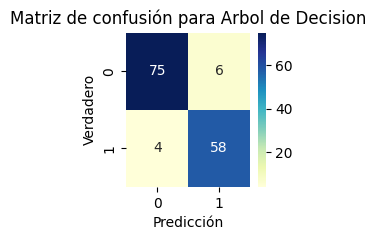

Reporte de clasificación para Arbol de Decision:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        81
           1       0.91      0.94      0.92        62

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



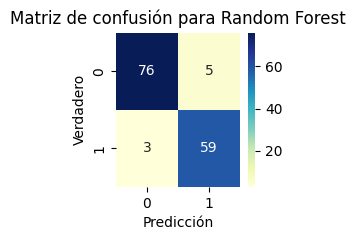

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        81
           1       0.92      0.95      0.94        62

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



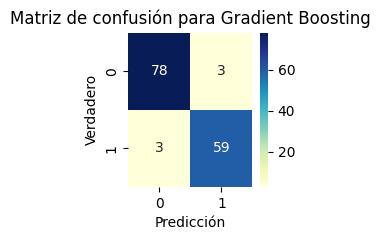

Reporte de clasificación para Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        81
           1       0.95      0.95      0.95        62

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [225]:
# Variables
X = df2.drop(["ID", "Diagnosis"], axis=1) # Características
y = df2["Diagnosis"] # Etiquetas

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento de modelos
modelos = {
    "Arbol de Decision": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)

# Evaluación de modelos
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
        # Matriz de confusión
    plt.figure(figsize=(2,2))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"Matriz de confusión para {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()
        # Reporte de clasificación
    print(f"Reporte de clasificación para {nombre}:\n{classification_report(y_test, y_pred)}")

En este punto se puede concluir que de acuerdo a las matrices de confusion y a las metricas de cada modelo:
**El modelo Gradient Boosting presenta mejores metricas de rendimiento comparado con los otros 2 modelos, los altos score F1 da indicio de un mejor balance entre "precision" y "recall".**


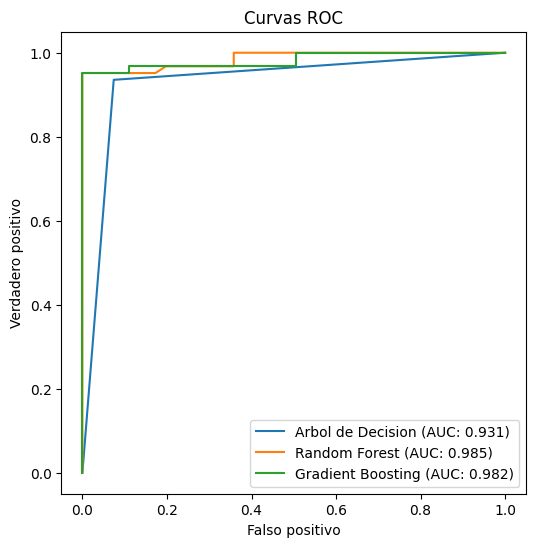

In [226]:
# Calcular las curvas ROC para cada modelo
fpr, tpr, _ = {}, {}, {}
roc_auc = []  # Create an empty list to store AUC values

for i, (nombre, modelo) in enumerate(modelos.items()):
    fpr[nombre], tpr[nombre], _ = roc_curve(y_test, modelo.predict_proba(X_test)[:, 1])
    roc_auc.append(auc(fpr[nombre], tpr[nombre]))

# Graficar las curvas ROC
plt.figure(figsize=(6, 6))
for i, nombre in enumerate(modelos):  # Loop with enumerate for index
    # Access elements using model names (dictionary keys)
    plt.plot(fpr[nombre], tpr[nombre], label=f"{nombre} (AUC: {roc_auc[i]:.3f})")
plt.xlabel("Falso positivo")
plt.ylabel("Verdadero positivo")
plt.title("Curvas ROC")
plt.legend()
plt.show()

Para este punto se observa un buen rendimiento entre los modelos RANDOM FOREST y GRADIENT BOOSTING. cabe resaltar que ambos presentan buen desempeño y pueden ser implementados.

# Reflexión
Los árboles de decisión son fáciles de interpretar y visualizar, pero tienden a sobreajustarse a los datos de entrenamiento. Los métodos de ensamble como Random Forest y Gradient Boosting mejoran la precisión al combinar múltiples modelos débiles. Estos métodos suelen ser más robustos y generalizan mejor a datos nuevos. Además, los métodos de ensamble pueden manejar características no lineales y relaciones complejas entre variables de manera más efectiva que los árboles de decisión simples.